In [1]:
max_n_image = 192560
max_n_image_not_nan = 42560

In [2]:
from Model import SegNetModel, RetrainedClassificationModel
from HyperparameterOptimization import findOptimalBatchSize

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from math import log, ceil
import numpy as np

In [4]:
model = RetrainedClassificationModel('noname')
model.load('tcm.212-0.15.hdf5')
bs =  findOptimalBatchSize(model, 128, save_excel=False)
acc_arr = []
hst_arr = []
for reduce_size in np.array(2) ** range(10, int(ceil(log(max_n_image_not_nan, 2))) + 1):
    reduce_size = min(reduce_size, max_n_image_not_nan)
    hst = model.train(bs, n_epoch=1000, reduced_size=reduce_size)
    hst_arr.append(hst)
    model.model.save(str(reduce_size) + '.hd5')
    acc = model.eval(bs, remove_nan=False)
    acc_arr.append(acc)
    print(reduce_size, acc)

C:\Users\matech\source\machine learning\Airbus-Ship-Detection-Challenge\Model\RetrainedClassificationModel.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fl...)`
  self.model = Model(input=model.input, output=predictions)


Testing batch size 128
Epoch 1/1
ResourceExhaustedError
Testing batch size 64
Epoch 1/1
ResourceExhaustedError
Testing batch size 32
Epoch 1/1
11/11 [==============================] - 71s 6s/step - loss: 0.1496 - precision: 0.5594 - recall: 0.6768 - f1: 0.6048 - val_loss: 0.0925 - val_precision: 0.6709 - val_recall: 0.5276 - val_f1: 0.5902
Testing batch size 16
Epoch 1/1
22/22 [==============================] - 16s 745ms/step - loss: 0.0907 - precision: 0.6652 - recall: 0.6120 - f1: 0.6335 - val_loss: 0.0869 - val_precision: 0.7643 - val_recall: 0.4936 - val_f1: 0.5991
Testing batch size 8
Epoch 1/1
44/44 [==============================] - 15s 345ms/step - loss: 0.0776 - precision: 0.7264 - recall: 0.6250 - f1: 0.6655 - val_loss: 0.0748 - val_precision: 0.7104 - val_recall: 0.5918 - val_f1: 0.6447
Testing batch size 4
Epoch 1/1
88/88 [==============================] - 16s 183ms/step - loss: 0.0772 - precision: 0.7251 - recall: 0.6079 - f1: 0.6526 - val_loss: 0.0990 - val_precision: 0.5

2868/2868 [==============================] - 2437s 850ms/step - loss: 0.0154 - precision: 0.7473 - recall: 0.5188 - f1: 0.6059 - val_loss: 0.0192 - val_precision: 0.6504 - val_recall: 0.4671 - val_f1: 0.5377
Epoch 14/1000
2868/2868 [==============================] - 2436s 849ms/step - loss: 0.0147 - precision: 0.7577 - recall: 0.5342 - f1: 0.6209 - val_loss: 0.0208 - val_precision: 0.7471 - val_recall: 0.3704 - val_f1: 0.4867
Epoch 15/1000
2868/2868 [==============================] - 2451s 855ms/step - loss: 0.0142 - precision: 0.7686 - recall: 0.5463 - f1: 0.6334 - val_loss: 0.0190 - val_precision: 0.7295 - val_recall: 0.4324 - val_f1: 0.5374
Epoch 16/1000
2868/2868 [==============================] - 2445s 853ms/step - loss: 0.0160 - precision: 0.7426 - recall: 0.5101 - f1: 0.5959 - val_loss: 0.0191 - val_precision: 0.7117 - val_recall: 0.4318 - val_f1: 0.5310
Epoch 17/1000
2868/2868 [==============================] - 2440s 851ms/step - loss: 0.0140 - precision: 0.7726 - recall: 0.554

Epoch 26/1000
3724/3724 [==============================] - 4251s 1s/step - loss: 0.0109 - precision: 0.7829 - recall: 0.5866 - f1: 0.6618 - val_loss: 0.0178 - val_precision: 0.6487 - val_recall: 0.3970 - val_f1: 0.4838
Epoch 27/1000
3724/3724 [==============================] - 4223s 1s/step - loss: 0.0100 - precision: 0.7947 - recall: 0.6030 - f1: 0.6796 - val_loss: 0.0178 - val_precision: 0.7071 - val_recall: 0.4214 - val_f1: 0.5208
Epoch 28/1000
3724/3724 [==============================] - 4231s 1s/step - loss: 0.0102 - precision: 0.7965 - recall: 0.6060 - f1: 0.6812 - val_loss: 0.0175 - val_precision: 0.6707 - val_recall: 0.4482 - val_f1: 0.5304
Epoch 29/1000
3724/3724 [==============================] - 4208s 1s/step - loss: 0.0091 - precision: 0.8151 - recall: 0.6365 - f1: 0.7098 - val_loss: 0.0191 - val_precision: 0.7239 - val_recall: 0.3870 - val_f1: 0.4963
42560 [0.0032512999271597626, 0.5236773485883377, 0.3669100660945462, 0.4129873156898301]


In [ ]:
# model = RetrainedClassificationModel('noname')
# model.load('tcm.212-0.15.hdf5')
# hst = model.train(32, n_epoch=1, reduced_size=1024)
# acc = model.eval(32, remove_nan=False)

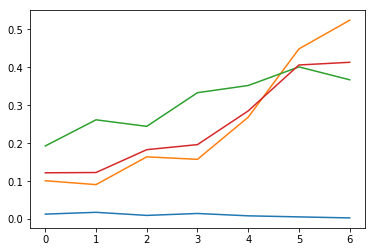

In [11]:
import matplotlib.pyplot as plt
# plt.plot([a[3] for a in acc_arr])
plt.plot(acc_arr)
plt.show()

In [46]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('objs.pkl', 'wb') as f:
    pickle.dump(acc_arr, f)

In [48]:
with open('objs.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    ret = pickle.load(f)

In [ ]:
acc_arr

In [49]:
ret

[[0.013259528256043084,
  0.10116207599276388,
  0.19274339562775353,
  0.12207641826250086],
 [0.017983075998552676,
  0.09092139726075817,
  0.26152280452311405,
  0.1227551974184721],
 [0.009872519662495636,
  0.16405171298167046,
  0.2443133390102966,
  0.1829050959813017],
 [0.014925235732997118,
  0.15747193618777577,
  0.3329722985113742,
  0.1962529428480856],
 [0.008740317461490925,
  0.2684278429244702,
  0.35180846691657436,
  0.2849779570690476],
 [0.005961130389793831,
  0.4481477013868608,
  0.4008457422828066,
  0.405882933062933],
 [0.0032512999271597626,
  0.5236773485883377,
  0.3669100660945462,
  0.4129873156898301]]

In [40]:
from getABSDData import getABSDDataMask
import cv2
import keras

n_training_images = 4
image_size = 224
# image_converter = lambda x: x/255
# training, dev, _ = getABSDDataMask(n_training_images, image_converter=image_converter, remove_nan=True, reduced_size=100)
label_converter = lambda x: cv2.resize(x, (image_size, image_size))
image_converter = lambda x: keras.applications.vgg16.preprocess_input(label_converter(x))

training, dev, _ = getABSDDataMask(n_training_images, label_converter=label_converter, image_converter=image_converter,
                                   reduced_size=16, remove_nan=True)

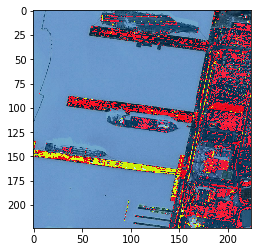

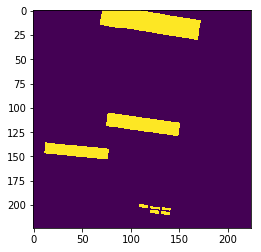

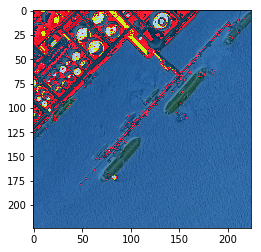

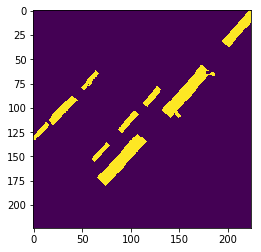

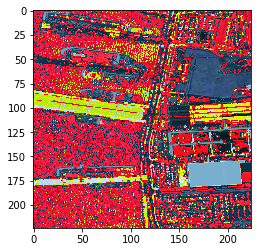

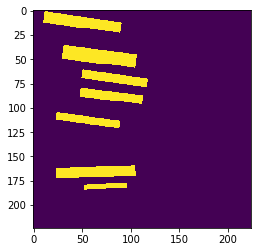

IndexError: index 3 is out of bounds for axis 0 with size 3

In [44]:
i, m = dev[0]
import matplotlib .pyplot as plt
import numpy as np
for id in range(n_training_images):
    plt.imshow((i[id, :, :, :] * 255).astype(np.uint8))
    plt.show()
    plt.imshow(m[id, :].reshape((image_size, image_size)))
    plt.show()

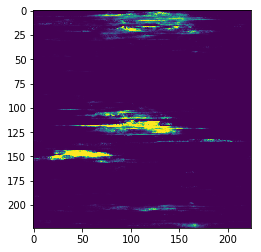

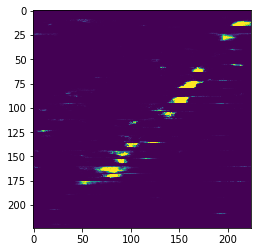

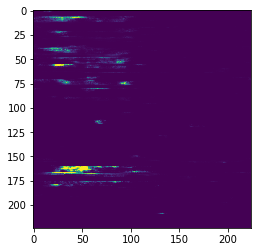

IndexError: index 3 is out of bounds for axis 0 with size 3

In [45]:
p = model.model.predict(i, batch_size=2)
for id in range(n_training_images):
    plt.imshow((p[id, :]).reshape((image_size, image_size))) # /p[id, :].max() #  > 0.5
    plt.show()

In [35]:
model.model.load(str(reduce_size) + '.hd5')

AttributeError: 'Model' object has no attribute 'load'

In [38]:
from Utilities.Metrics import precision, recall, f1
keras.metrics.precision = precision
keras.metrics.recall = recall
keras.metrics.f1 = f1

In [39]:
model.model = keras.models.load_model(str(reduce_size) + '.hd5')